***
<a id='lesson-9'></a>
# Epicycle: a circle rolling over another circle
***

Circle moving on other circle is a frequent motif in the models of planetary model.  For example, imagine descirbing the motion of moon; in a helio-centric model, moon circles earth while the earth circles around the sun. 

Fourier showed that ANY curve can be described as a motion of a circle which is moving on another circle, which is moving on another circle and so on. In this lesson, we will explore the Fourier analysis using complex numbers.

We want to model a closed curve in two dimensions; as a simplistic example, consider a circle with center at origin given by $x^2 + y^2 = c^2$, with $c$ being the radius of the circle. Of specific interest is the parametric description with parameter $t$, the circle has following parametric description: $x(t) = c \cos(t)$ and $y(t) = c \sin(t)$. The complex number description of this parametrization is given by $z(t) = c \exp(j t)$ where $j= \sqrt{-1}$. 

Let us consider:  $z(t) = c e^{jt}$, this has $z(t) = z(t+ 2 \pi)$, i.e. with a period of $2\pi$ any point returns to itself. 

Now consider: $z(t) = c e^{njt}$, this has $z(t) = z(t + 2\pi/n)$, i.e. with a period of $2\pi/n$ evey point returns to itself. 

For the sake of having a period 1 unit of time and fractions of it, we will consider $z(t) = c e^{2\pi n j t}$, which has a period of 1/n unit of time.



In [1]:
import cmath
import numpy as np
import matplotlib.pyplot as plt

See python documentation for `cmath` at https://docs.python.org/3.5/library/cmath.html

Consider an epicycle given by: $z(t) = c_1 e^{2\pi jt} + c_2 e^{30\pi jt}$

Consider that there are a series of observations $\vec{r}_i= (x_i,y_i),\, i\in[1,N]$. We will form the closed curve by $\vec{r}_{N+i} = \vec{r}_i$. We want to find a epicyclic desription of the complex function $z(t)$ such that for $t_i=\tau*i$, we have $z(t_i)=(x_i,y_i)$.  That is, we want to find a description
$$  z(t) = \sum_n c_n * e^{2 \pi j~n~t} \tag{eq:1}
$$
where the coefficient $c_n$ can be a complex number, and $n \in \mathcal{Z}$; later we will show that 
$\tau = \frac{1}{N}$.

Lets try formulate the problem. Given $z_i \forall i \in [1,N]$, with $z_i \equiv z(t_i)$, find $c_n$ in the Equation eq:1 above. 

Solution: Consider $$z(t)*e^{- 2\pi j m t} = \sum_n c_n * e^{2 \pi j~(n-m)~t}$$
then integrating on both sides from $t=0$ $t=1$, gives us 
$$ \int_0^1 dt~z(t)*e^{- 2\pi j m t} = c_m \implies c_m = \tau \sum_{i=1}^{N} z_i*e^{-2\pi j m~i \tau}
$$
Typically $c_n$ is found for $|n| \le n_{max}$ i.e. $n \in [-n_{max}, \cdots, 0 , \cdots, -n_{max}]$

Now given the above created dictionary, reconstruct the curve from it


You are given three shapes: curve_para-1-v2.dat, hut-2.dat and pi-3.dat

Find the fourier coefficeints for each of them. Plot the reconstructed curves. Comment

In [48]:
curve1= numpy.loadtxt('/home/prabhakar/curve_para-1-v2.dat')

In [2]:
cat /home/prabhakar/Documents/Courses/curve_para-1-v2.dat

121.49305 24.870832
107.49556 28.132284
100.09688 36.593452
102.59857 45.19524
118.11889 49.939392
127.84305 50.976391
133.17926 55.077209
133.3734 65.122757
120.6111 70.555557
107.85551 73.181053
100.23964 79.049072
103.67777 88.194443
116.85825 93.379539
124.66315 94.171944
121.51106 105.78836
115.76173 112.59842
106.22371 109.85727
102.96416 100.91142
111.91701 94.309814
126.43134 88.897537
133.66388 81.315277
129.43056 70.379166
120.96388 66.851387
113.90132 60.350796
118.67082 51.858334
137.76537 49.918056
154.39876 47.793934
161.08369 39.599545
154.65416 31.397223
144.56799 24.620348
133.48749 22.048611
122.02221 21.872223
121.95285 22.265259


# Tasks:::
1. Write function `compute_Fourier_dict( zvals, n_max )` to return a dictionary for coefficients with index $-n_{max} \le n \le n_{max}$
2. Write function to take the dictornary of fourier coefficents and plot the 'reconstrcution'; funciton `reconstruct_Fourier_dict( fourier_dict )`
3. Use thes functions on the three examples provided to you. Comment.
4. Use Inkscape (Unix) to draw your own shape, and get the curve data and get fourier coefficients, and reconstruction

In [2]:
def compute_Fourier_dict( zvals, n_max ):
    values = {}
    for i in range(-1*n_max,n_max+1):
        val = fourier_coeff(zvals,i)
        values[i] = val
        
    # return dictionary of fourier coefficients    
    return values;

In [3]:
def fourier_coeff(zvals, m):    
    points = np.shape(zvals)[0]  
    r_val = np.linspace(0,1,points+1)[1:]    
    val = 1.0/points * np.sum( zvals * np.exp(-2*np.pi*1j*m*r_val) )    
    
    # return the calculated coefficient
    return val

In [4]:
def reconstruct_Fourier_dict( fourier_dict ):
    z_restruct = np.zeros(1000, dtype = complex)
    r_val= np.linspace(0,1,1001)[1:]
    for i in fourier_dict.keys():
        z_restruct += fourier_dict[i] * np.exp(2*np.pi*1j*i*r_val)
    plt.plot(z_restruct.real, z_restruct.imag, ".")
    plt.title("Reconstructed figure")

Figure-1

In [5]:
curve_pi = np.loadtxt('curve-pi.dat')

Text(0.5, 1.0, 'Original figure')

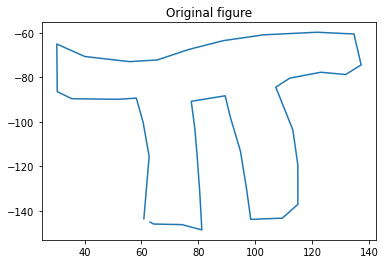

In [6]:
plt.plot(curve_pi[:,0], curve_pi[:,1])
plt.title("Original figure")

In [7]:
curve_pi = curve_pi[:,0] + 1j*curve_pi[:,1]

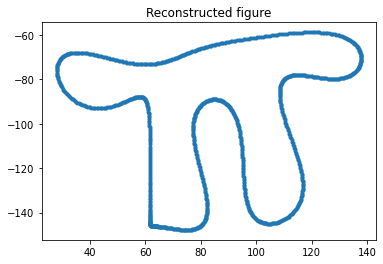

In [8]:
reconstruct_Fourier_dict(compute_Fourier_dict(curve_pi, 10))

Figure-2

In [9]:
curve_pi = np.loadtxt('curve_para-1-v2.dat')

Text(0.5, 1.0, 'Original figure')

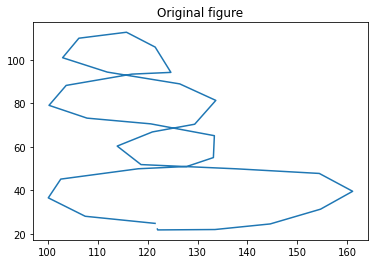

In [10]:
plt.plot(curve_pi[:,0], curve_pi[:,1])
plt.title("Original figure")

In [11]:
curve_pi = curve_pi[:,0] + 1j*curve_pi[:,1]

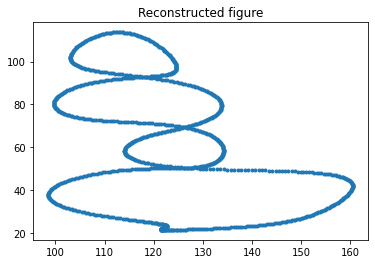

In [12]:
reconstruct_Fourier_dict(compute_Fourier_dict(curve_pi, 10))

Figure-3

In [13]:
curve_pi = np.loadtxt('coord.dat')

Text(0.5, 1.0, 'Original figure')

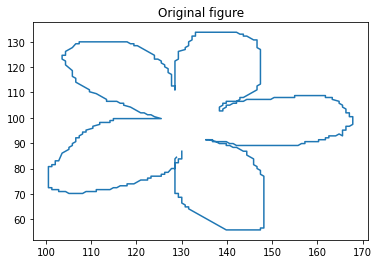

In [14]:
plt.plot(curve_pi[:,0], curve_pi[:,1])
plt.title("Original figure")

In [15]:
curve_pi = curve_pi[:,0] + 1j*curve_pi[:,1]

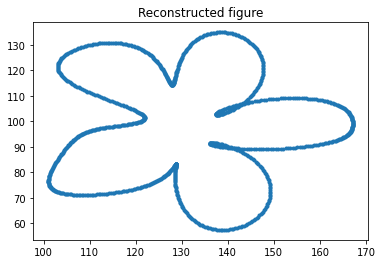

In [16]:
reconstruct_Fourier_dict(compute_Fourier_dict(curve_pi, 10))

Comments:
    As can be seen, fourier transforms can be used to recreate figures using epicycles. (The first one in each case is the original figure and the second one is the reconstructed one)

## short note on making shapes
We will use inkscape program. Draw a shape in inkscape. Save the file as svg, for example 'pi.svg'. From this file, we will extract the path.

Run the following command  in a terminal: 

`grep -v 'inkscape' pi.svg | grep -e cx -e cy  | sed -e 's/"//g' -e 's/cx=//g' -e 's/cy=//g' -e 's/\/>//g' > pi.dat`

In the Jupyter notebook run the following commands:

`curve_pi = loadtxt('pi.dat') # command to load the data` 

and then 

`curve_pi = curve_pi.reshape( int(shape(curve_pi)[0]/2), 2) )`


In [33]:
curve_pi = loadtxt('/tmp/pi.dat')

In [3]:
cat /home/prabhakar/Documents/Courses/pi-3.dat

60.854166 -143.54167
62.706249 -115.49583
60.589583 -100.15
58.208333 -89.302084
51.954042 -89.83125
35.532988 -89.566667
30.427083 -86.391667
30.261577 -64.966797
40.11226 -70.58208
55.84397 -72.897917
65.65044 -72.104167
76.717289 -67.371466
88.825979 -63.442558
103.02191 -60.819743
121.70833 -59.668751
134.67291 -60.462501
137.2045 -74.350308
131.7652 -78.686125
123.03125 -77.660417
112.11589 -80.302739
107.21489 -84.372719
113.21033 -103.64871
114.95576 -119.33255
114.97706 -137.08417
109.49854 -143.2698
98.40901 -143.8321
96.897487 -129.76806
94.783267 -113.11451
91.250826 -97.895848
89.429156 -88.24375
77.500933 -90.72854
78.746064 -102.79205
79.604333 -115.7488
80.490043 -131.53452
81.227072 -148.56875
74.263468 -146.1875
64.293739 -145.92292
63.029539 -145.0477



In [38]:
curve_pi = curve_pi.reshape((int(shape(curve_pi)[0]/2),2))

In [37]:
shape(curve_pi)[0]/2

136.0

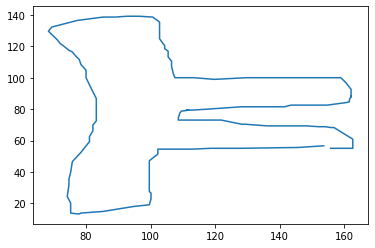

In [44]:
plot(curve_pi[:,0], curve_pi[:,1])

Cleary the 'pi' shape to be rotated, which will do below:

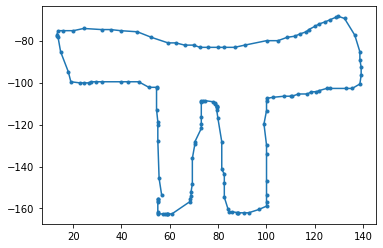

In [43]:
y_pi = -curve_pi[:,0]
x_pi = curve_pi[:,1]
plot(x_pi,y_pi,'.-')